In [1]:
import sys, os, csv, h5py
sys.path.append('..')
import pandas as pd
import numpy as np

In [2]:
#del sys.modules['tools.instruments']
from tools.instruments import instruments
from tools.constants import SRF_ROLLOVER_BO_CSV_PATH,SRF_CONTINUOUS_BO_DB_PATH
from tools.display import view

In [14]:
%load_ext autoreload
%aimport tools.instruments
%autoreload 2

In [103]:
method='bo'
#if method == 'bv':
#    file = h5py.File(SRF_CONTINUOUS_BV_DB_PATH, 'w')
if method =='bo':
    file = h5py.File(SRF_CONTINUOUS_BO_DB_PATH, 'w')

In [ ]:
fields = ['open','high','low','close']
# numpy array datatypes
dtypes= np.dtype([
        ('date', 'i'),
        ('open', 'f'),
        ('high','f'),
        ('low','f'),
        ('close','f'),
        ('volume', 'i'),
        ('open_interest','i')
    ])

for instrument in instruments.values():
    if not instrument.contracts:
        print(f"{instrument.name}은 대상 상품이 아님")
        continue
    print(f"{instrument.name}: {method} 방식으로 연결")
        
    rolls = instrument.rolldates(method = method)
    data = pd.DataFrame()
    for roll in rolls:
        code, start, diff = roll[1], roll[2], float(roll[5])
        end = roll[3] if roll[3] else None

        quotes = instrument.quotes(contract=code)[start:end]

        if len(data) > 0:
            data[fields] = data[fields]+ diff
        data = pd.concat([data, quotes])
    
    #거래량은 모든 월물의 동일한 날짜 거래량을 합산함
    quotes['volume'] = 0
    quotes['oi'] = 0
    
    for contract in instrument.contracts:
        volume = instrument.quotes(contract=contract[2])['volume']
        oi = instrument.quotes(contract=contract[2])['oi']
        quotes['volume'] = quotes['volume'].add(volume, fill_value=0)
        quotes['oi'] = quotes['oi'].add(oi, fill_value=0)
    
    
        
    data.reset_index(inplace=True)
    data['date'] = data['date'].values.astype('M8[D]').astype('i')
    data = np.array(list(map(tuple, data.values)), dtypes)
    file.create_dataset(instrument.symbol, data=data)
    
print('DOne')
file.close()

CME Australian Dollar AUD: bo 방식으로 연결
SHFE Aluminium은 대상 상품이 아님
ICE Rotterdam Coal은 대상 상품이 아님
ICE Brent Crude Oil은 대상 상품이 아님
CBOT Soybean Oil: bo 방식으로 연결
CME British Pound GBP: bo 방식으로 연결
CBOT Corn: bo 방식으로 연결
ICE Cocoa: bo 방식으로 연결
CME Canadian Dollar CAD: bo 방식으로 연결
NYMEX WTI Crude Oil: bo 방식으로 연결
ICE Cotton: bo 방식으로 연결
SHFE Copper은 대상 상품이 아님
CME Class III Milk은 대상 상품이 아님
ICE US Dollar Index: bo 방식으로 연결
CME Euro FX: bo 방식으로 연결
CME Eurodollar: bo 방식으로 연결
CME S&P 500 Index E-Mini: bo 방식으로 연결
EUREX Euro-BTP은 대상 상품이 아님
EUREX DAX은 대상 상품이 아님
EUREX EURO STOXX 50 Index은 대상 상품이 아님
CME 30 Day Federal Funds Futures: bo 방식으로 연결
EUREX Euro-Bund은 대상 상품이 아님
EUREX Euro-Bobl은 대상 상품이 아님
EUREX Euro-Schatz은 대상 상품이 아님
EUREX Euro-OAT은 대상 상품이 아님
CBOT 5-year US Treasury Note: bo 방식으로 연결
ICE Gasoil: bo 방식으로 연결
NYMEX Gold: bo 방식으로 연결
COMEX Copper: bo 방식으로 연결
NYMEX Heating Oil: bo 방식으로 연결


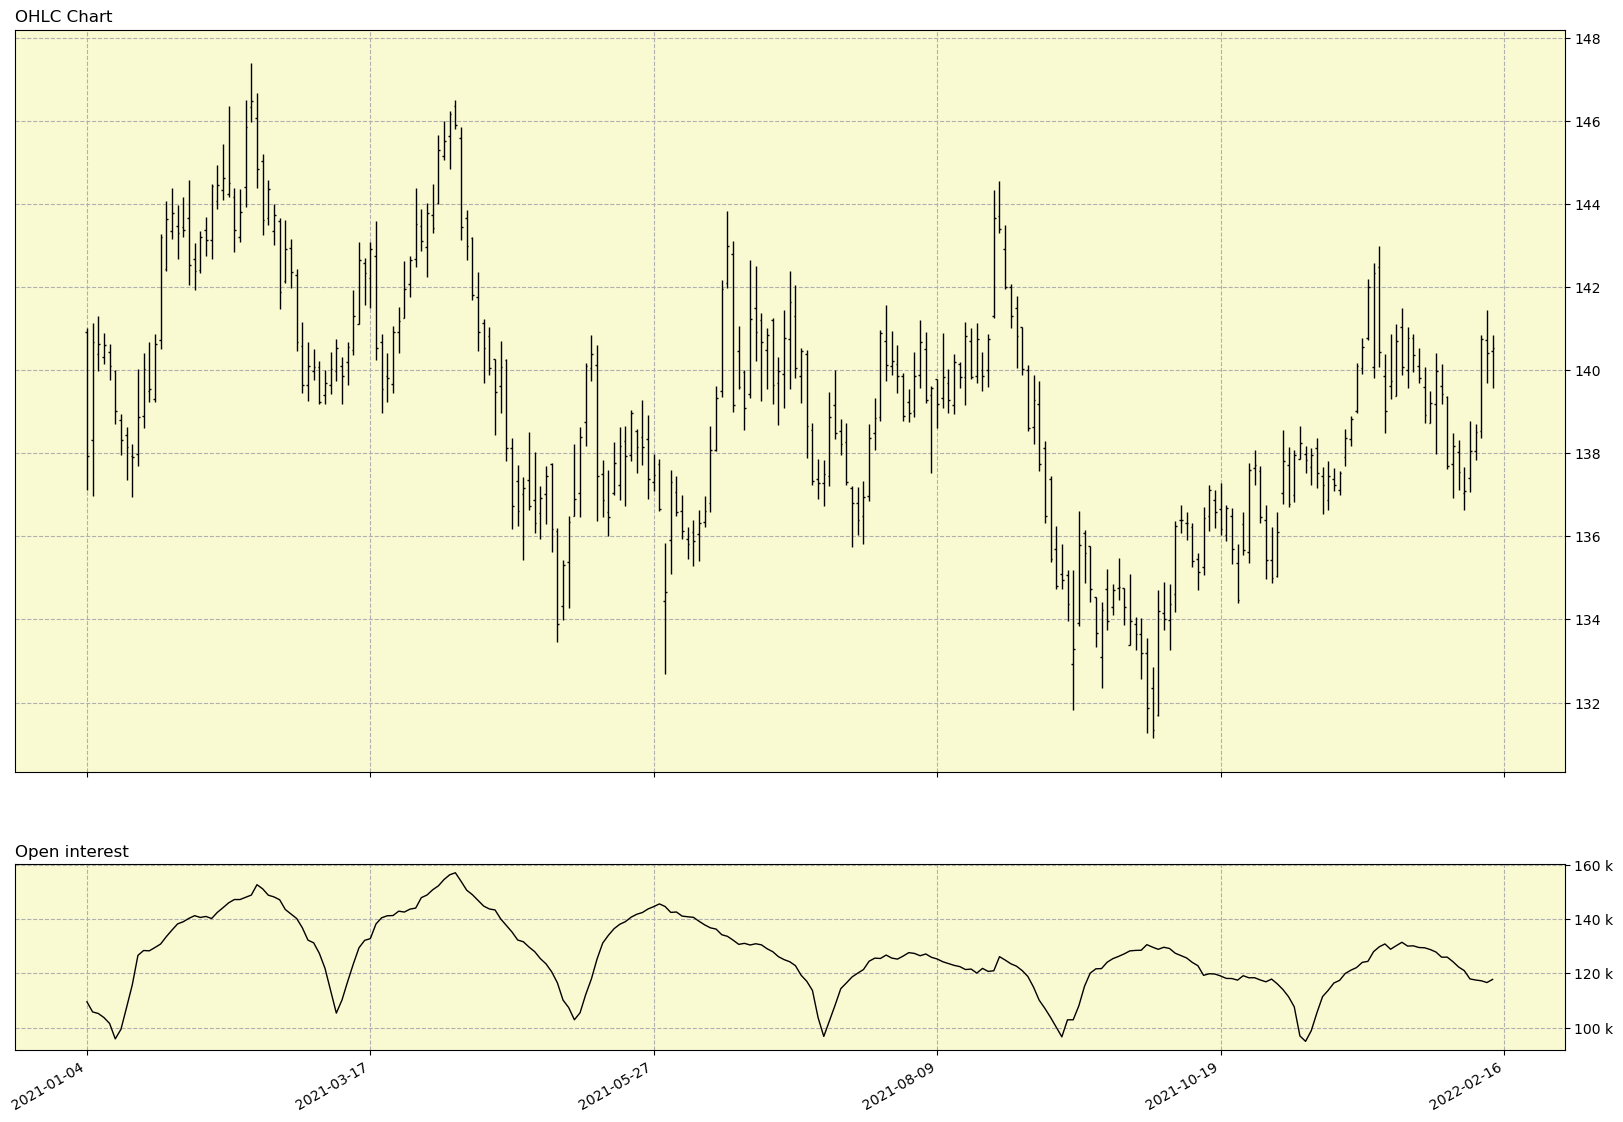

In [101]:
quotes = instruments['LC'].quotes()
view(quotes['2021-01-01':'2021-12-28'], size=(20,15))

In [102]:
file.close()

In [75]:
quotes = instruments['AD'].quotes()


In [77]:
quotes['volume'] = 0

In [78]:
for contract in contracts:
    volume = instruments['AD'].quotes(contract=contract[2])['volume']
    quotes['volume'] = quotes['volume'].add(volume, fill_value=0)
    

<AxesSubplot:xlabel='date'>

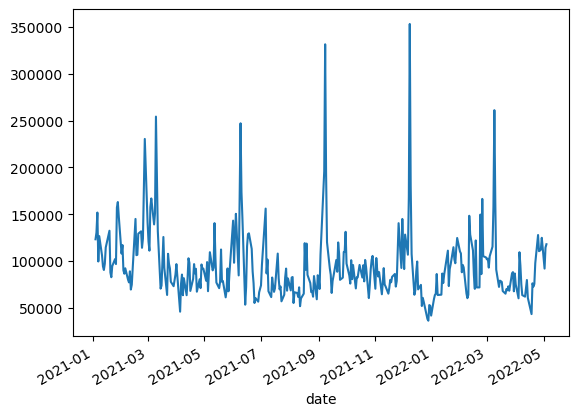

In [87]:
quotes['volume'].loc['2021-01-01':].plot()

<AxesSubplot:xlabel='date'>

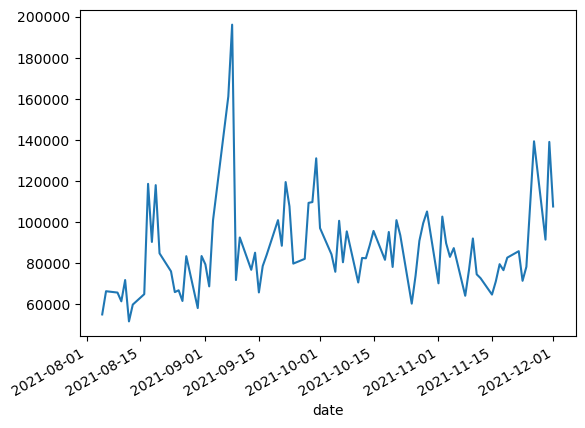

In [92]:
df['volume'].loc['2021-08-05':'2021-12-01'].plot()

,date,volume
0,1987-01-16,2
1,1987-01-19,1
2,1987-01-20,0
3,1987-01-21,0
4,1987-01-22,1
...,...,...
162,1987-09-08,237
163,1987-09-09,23
164,1987-09-10,185
165,1987-09-11,173


In [56]:
quotes = instruments['AD'].quotes()

In [68]:
quotes['volume']=0

In [74]:
quotes['volume'] = quotes['volume'].add(volumes[3], fill_value=0)
quotes

field,open,high,low,close,volume,oi
date,,,,,,
1987-01-13,0.01070,0.01180,0.00680,0.00700,1854.0,915
1987-01-14,-0.00300,-0.00190,-0.00640,-0.00530,1522.0,930
1987-01-15,0.00480,0.00490,0.00350,0.00370,571.0,786
1987-01-16,0.00560,0.00680,0.00560,0.00650,556.0,964
1987-01-19,0.00640,0.00980,0.00640,0.00830,516.0,866
...,...,...,...,...,...,...
2022-04-28,0.71290,0.71660,0.70595,0.70995,0.0,144283
2022-04-29,0.71035,0.71845,0.70610,0.70870,0.0,144179
2022-05-02,0.70710,0.70870,0.70355,0.70415,0.0,140428


In [71]:
quotes

field,open,high,low,close,volume,oi
date,,,,,,
1987-01-13,0.01070,0.01180,0.00680,0.00700,1854.0,915
1987-01-14,-0.00300,-0.00190,-0.00640,-0.00530,1446.0,930
1987-01-15,0.00480,0.00490,0.00350,0.00370,539.0,786
1987-01-16,0.00560,0.00680,0.00560,0.00650,537.0,964
1987-01-19,0.00640,0.00980,0.00640,0.00830,506.0,866
...,...,...,...,...,...,...
2022-04-28,0.71290,0.71660,0.70595,0.70995,0.0,144283
2022-04-29,0.71035,0.71845,0.70610,0.70870,0.0,144179
2022-05-02,0.70710,0.70870,0.70355,0.70415,0.0,140428
